In [1]:
import pandas as pd
import numpy as np
import random
import math
from collections import OrderedDict
import matplotlib.pyplot as plt
import KNN
import utils
import DT

In [2]:
X, Y = utils.read_data("/Users/sana/Downloads/HW1-8/data/heart.csv", 'target')
X, Y = utils.preprocessDT(X, Y)
X, Y = utils.shuffle(X, Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
Xtrain, Ytrain, Xtest, Ytest = utils.split(X, Y, 0.2)

In [4]:
percisions = []
for i in range(13):
    decision_tree = DT.DecisionTree(i, 0.8)
    decision_tree.fit(Xtrain, Ytrain)
    predicted = decision_tree.predict(Xtest)
#     print(predicted)
    print(utils.find_percision(predicted, Ytest))
    percisions.append(utils.find_percision(predicted, Ytest))

0.36065573770491804
0.36065573770491804
0.4918032786885246
0.6885245901639344
0.6721311475409836
0.7704918032786885
0.7868852459016393
0.7704918032786885
0.7704918032786885
0.7704918032786885
0.7704918032786885
0.7704918032786885
0.7704918032786885


No handles with labels found to put in legend.


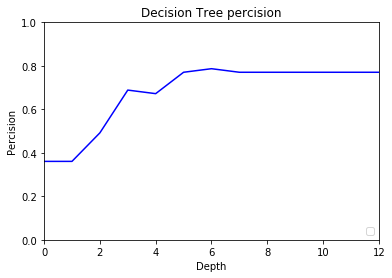

In [5]:
plt.plot(np.arange(13), percisions, 'b')
plt.legend(loc='lower right')
plt.xlim([0, 12])
plt.ylim([0, 1])
plt.ylabel('Percision')
plt.xlabel('Depth')
plt.title('Decision Tree percision')
plt.show()

<div dir='rtl'>
   همانطور که می‌بینیم با بالا رفتن عمق داده ابتدا accuracy بالا رفته‌است، سپس پایین آمده که نشان می‌ دهد اگر عمق درخت زیاد باشد over fit می‌کند موجب می‌شود دقت پایین‌تر بیاید و پایین بودن دقت در عمق‌های کم به دلیل under fit و عدم امکان دست تشخیص دادن می‌باشد.
     طبق نتایج  بالا  بهترین عمق ۶ می‌باشد، ولی این معیار نهایی ما نمی‌تواند باشد چون داده‌های تست خیلی رندم انتخاب شدند و این‌گونه  تصمیم‌‌گیری  درست نیست و باید cross validation  انجام دهیم  تا بتوانیم دقت متوسط را بدست آوریم و تصمیم درست‌تر بگیریم. کلا به دلیل shuffle می‌توانیم نمودار‌های متفاوتر از این ببینیم ولی در حال کلی  به صورت  بالا می‌باشد.
</div>

In [6]:
Xtrainf, Ytrainf, Xtestf, Ytestf = utils.fivefold(Xtrain, Ytrain)

In [7]:
percisions = []
for i in range(13):
    p  = 0
    for j in range(5):
        decision_tree = DT.DecisionTree(i, 0.8)
        decision_tree.fit(Xtrainf[j], Ytrainf[j])
        predicted = decision_tree.predict(Xtestf[j])
        p += utils.find_percision(predicted, Ytestf[j])
    percisions.append(p/5)

In [8]:
print(percisions)

[0.5166666666666667, 0.5166666666666667, 0.3833333333333333, 0.7, 0.7041666666666667, 0.7249999999999999, 0.7291666666666666, 0.7291666666666666, 0.7291666666666666, 0.7291666666666666, 0.7291666666666666, 0.7291666666666666, 0.7291666666666666]


No handles with labels found to put in legend.


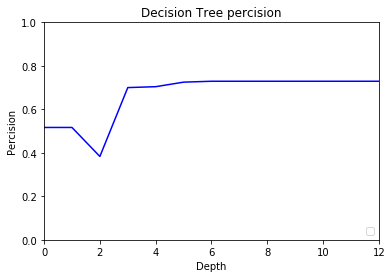

In [9]:
plt.plot(np.arange(13), percisions, 'b')
plt.legend(loc='lower right')
plt.xlim([0, 12])
plt.ylim([0, 1])
plt.ylabel('Percision')
plt.xlabel('Depth')
plt.title('Decision Tree percision')
plt.show()

In [10]:
best_d = 0
best_acc = 0
for i in range(len(percisions)):
    if percisions[i] > best_acc :
        best_d = i
        best_acc = percisions[i]
print(best_d)

6


In [11]:
decision_tree = DT.DecisionTree(best_d, 0.8)
decision_tree.fit(Xtrain, Ytrain)
predictedDT = decision_tree.predict(Xtest)
y_scoresDT = decision_tree.predict_prob(Xtest)

No handles with labels found to put in legend.


Confusion Matrix:  [[15, 7], [6, 33]]
Confusion Matrix:  [[15, 7], [6, 33]]
Accuracy:  0.7868852459016393
Precision:  0.825
Recall:  0.8461538461538461
F1Score:  0.8354430379746836
Specificity:  0.6818181818181818
1001


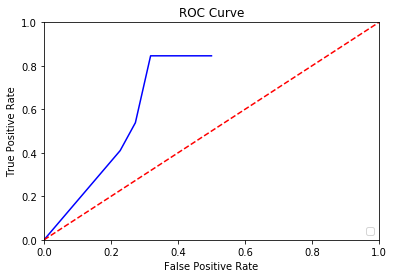

In [12]:
utils.confusion_matrix(predictedDT, Ytest)
utils.classification_report(predictedDT, Ytest)
utils.draw_ROC(y_scoresDT,Ytest)

In [13]:
X, Y = utils.read_data("/Users/sana/Downloads/HW1-8/data/heart.csv", 'target')
X, Y = utils.shuffle(X, Y)
Xtrain, Ytrain, Xtest, Ytest = utils.split(X, Y, 0.2)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [14]:
percisions = []
for i in range(1,16):
    knn = KNN.kNN(i)
    knn.fit(Xtrain, Ytrain)
    predicted = knn.predict(Xtest)
#     print(predicted)
    print(utils.find_percision(predicted, Ytest))
    percisions.append(utils.find_percision(predicted, Ytest))

0.7049180327868853
0.7049180327868853
0.7377049180327869
0.7540983606557377
0.7540983606557377
0.7540983606557377
0.7213114754098361
0.7540983606557377
0.7377049180327869
0.7377049180327869
0.6885245901639344
0.6885245901639344
0.7049180327868853
0.7049180327868853
0.6885245901639344


No handles with labels found to put in legend.


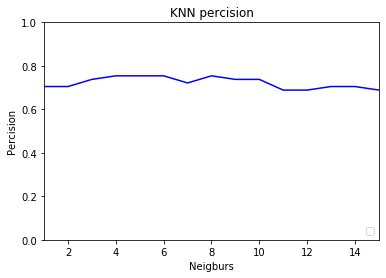

In [15]:
plt.plot(np.arange(1,16), percisions, 'b')
plt.legend(loc='lower right')
plt.xlim([1, 15])
plt.ylim([0, 1])
plt.ylabel('Percision')
plt.xlabel('Neigburs')
plt.title('KNN percision')
plt.show()

<div dir='rtl'>
همانطور که می‌بیند نمودار خیلی بالا پایین رفته اما اگر روند کلی آن را در نظر بگیریم٬ با افزایش k ابتدا accuracy بالا رفته  سپس پایین آمده، که این نشان دهنده این است که ابتدا  با کم بودن  k، overfit  کرده بود و accuracy پایین‌تری داشت،  با بالا رفتن k ابتدا  fit شده و بهترین مقدار‌ها برای k یعنی ۴، ۵، ۶  و ۸ را به دست آورده. سپس با  بالاتر رفتن k، underfit اتفاق افتاده و accuracy پایین‌تر آمده‌‌است.
    ولی این معیار نهایی ما نمی‌تواند باشد چون داده‌های تست خیلی رندم انتخاب شدند و این‌گونه  تصمیم‌‌گیری  درست نیست و باید cross validation  انجام دهیم  تا بتوانیم دقت متوسط را بدست آوریم و تصمیم درست‌تر بگیریم. کلا به دلیل shuffle می‌توانیم نمودار‌های متفاوتر از این ببینیم ولی در حال کلی  به صورت  بالا می‌باشد.
</div>



In [16]:
Xtrainf, Ytrainf, Xtestf, Ytestf = utils.fivefold(Xtrain, Ytrain)

In [17]:
percisions = []
for i in range(1,16):
    p  = 0
    for j in range(5):
        knn = KNN.kNN(i)
        knn.fit(Xtrainf[j], Ytrainf[j])
        predicted = knn.predict(Xtestf[j])
        p += utils.find_percision(predicted, Ytestf[j])
    percisions.append(p/5)

In [18]:
print(percisions)

[0.5166666666666667, 0.5166666666666667, 0.5416666666666666, 0.5375000000000001, 0.5874999999999999, 0.5333333333333333, 0.5833333333333333, 0.575, 0.6000000000000001, 0.5875, 0.6083333333333333, 0.6125, 0.6208333333333333, 0.5916666666666667, 0.5833333333333333]


No handles with labels found to put in legend.


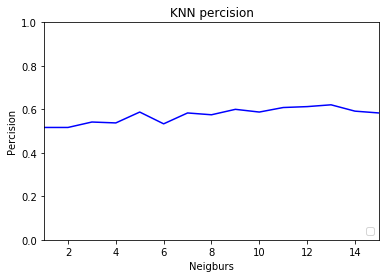

In [19]:
plt.plot(np.arange(1,16), percisions, 'b')
plt.legend(loc='lower right')
plt.xlim([1, 15])
plt.ylim([0, 1])
plt.ylabel('Percision')
plt.xlabel('Neigburs')
plt.title('KNN percision')
plt.show()

In [20]:
best_K = 0
best_acc = 0
for i in range(len(percisions)):
    if percisions[i] > best_acc :
        best_K = i
        best_acc = percisions[i]
print(best_K)

12


In [21]:
knn = KNN.kNN(best_K)
knn.fit(Xtrain, Ytrain)
predictedKnn = knn.predict(Xtest)
y_scoresKnn = knn.predict_prob(Xtest)

No handles with labels found to put in legend.


Confusion Matrix:  [[23, 13], [6, 19]]
Confusion Matrix:  [[23, 13], [6, 19]]
Accuracy:  0.6885245901639344
Precision:  0.59375
Recall:  0.76
F1Score:  0.6666666666666666
Specificity:  0.6388888888888888
1001


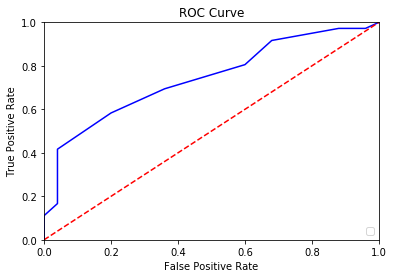

In [22]:
utils.confusion_matrix(predictedKnn, Ytest)
utils.classification_report(predictedKnn, Ytest)
utils.draw_ROC(y_scoresKnn,Ytest)

In [26]:
a= [0 for i in range(len(predictedKnn))]
for i in range(len(predictedKnn)):
    if predictedKnn[i] == Ytest[i]:
        a[i] = 1
b= [0 for i in range(len(predictedKnn))]
for i in range(len(predictedDT)):
    if predictedDT[i] == Ytest[i]:
        b[i] = 1
print(len(a))
# t_test(np.array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]),
#        np.array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]))
print("t-value:",utils.t_test(a,b))

61
0.93577
P-value is: 12.846000000000002  
t-value: 1.538218091741372


<div dir='rtl'>
در t-test در نظر گرفته شده٬ null-hypothesis: هر دو classifier از نظر بهتر بودن در یک سطح هستند. not null-hypothesis: یکی از classifierها از دیگری بهتر است.
    در بالا p-value برابر ۱۲.۸۴ می‌باشد . از این می‌‌توان نتیجه گرفت که احتمال دیدن تفاوتی به این اندازه بین ۲ classifier برابر ۱۲.۸۴٪ است.
    significance برابر ۸۷.۱۶ ٪ است.
</div>